In [1]:
import pickle
with open('donnees_nettete.pkl', 'rb') as fichier:
    nettete = pickle.load(fichier)
with open('donnees_bruit_HF.pkl', 'rb') as fichier:
    bruit = pickle.load(fichier)
with open('donnees_resolutions.pkl', 'rb') as fichier:
    resolution = pickle.load(fichier)
with open('donnees_mean_H.pkl', 'rb') as fichier:
    mean_H = pickle.load(fichier)
with open('donnees_mean_S.pkl', 'rb') as fichier:
    mean_S = pickle.load(fichier)
with open('donnees_mean_V.pkl', 'rb') as fichier:
    mean_V = pickle.load(fichier)

In [2]:
features = [nettete,bruit,resolution,mean_H,mean_S,mean_V]
decennies = []
L = [604, 658, 561, 649, 773, 587, 615, 632, 564, 563, 586, 751]
for i in range(len(L)):
    for j in range(L[i]):
        decennies.append(1900 + i * 10) 
        
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)      



In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Entraînement de la Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=2)
rf.fit(train_features, train_labels)

# Prédiction avec la Random Forest
rf_predictions_train = rf.predict(train_features)
rf_predictions_test = rf.predict(test_features)

# Utilisation des prédictions de la Random Forest comme caractéristiques pour le réseau de neurones
X_train_with_rf = np.concatenate((train_features, rf_predictions_train.reshape(-1, 1)), axis=1)
X_test_with_rf = np.concatenate((test_features, rf_predictions_test.reshape(-1, 1)), axis=1)

# Création et entraînement du réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_rf.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train_with_rf, train_labels, epochs=10, batch_size=32)

# Prédiction avec le réseau de neurones
nn_predictions = model.predict(X_test_with_rf)

# Évaluation des performances
mse = np.mean((nn_predictions - test_labels) ** 2)
rmse = np.sqrt(mse)
print("RMSE du modèle combinant la Random Forest et le réseau de neurones : ", rmse)


Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 160564.6250
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 1393.2635
Epoch 3/10
189/189 [==============================] - 0s 2ms/step - loss: 1399.3517
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 1324.7445
Epoch 5/10
189/189 [==============================] - 0s 1ms/step - loss: 1334.5553
Epoch 6/10
189/189 [==============================] - 0s 1ms/step - loss: 1267.3030
Epoch 7/10
189/189 [==============================] - 0s 1ms/step - loss: 1284.4581
Epoch 8/10
189/189 [==============================] - 0s 1ms/step - loss: 1208.4558
Epoch 9/10
189/189 [==============================] - 0s 1ms/step - loss: 1180.6176
Epoch 10/10
48/48 [==============================] - 0s 1ms/step
RMSE du modèle combinant la Random Forest et le réseau de neurones :  49.29870094065857


Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 172452.1719
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 1846.4651
Epoch 3/10
189/189 [==============================] - 0s 1ms/step - loss: 1832.2112
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 1718.9065
Epoch 5/10
189/189 [==============================] - 0s 1ms/step - loss: 1684.0842
Epoch 6/10
189/189 [==============================] - 0s 1ms/step - loss: 1532.1333
Epoch 7/10
189/189 [==============================] - 0s 1ms/step - loss: 1541.7587
Epoch 8/10
189/189 [==============================] - 0s 1ms/step - loss: 1522.4751
Epoch 9/10
189/189 [==============================] - 0s 1ms/step - loss: 1479.7916
Epoch 10/10
48/48 [==============================] - 0s 780us/step
Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 223564.1094
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 1328.6483
Epoch

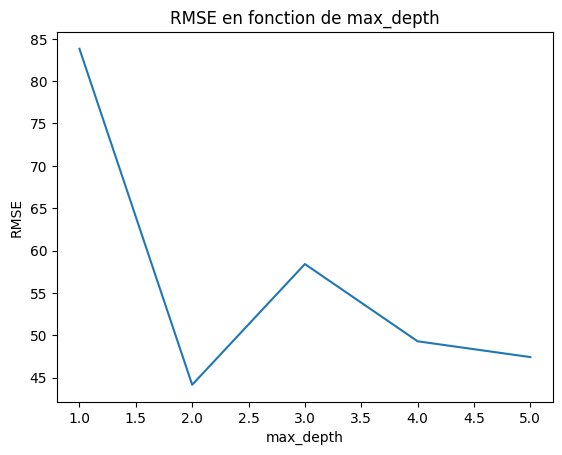

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)


max_depth_values=[]
rmse_values=[]
a=[1,2,3,4,5]
for max_depth in a:
    # Entraînement de la Random Forest
    rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth)
    rf.fit(train_features, train_labels)

    # Prédiction avec la Random Forest
    rf_predictions_train = rf.predict(train_features)
    rf_predictions_test = rf.predict(test_features)

    # Utilisation des prédictions de la Random Forest comme caractéristiques pour le réseau de neurones
    X_train_with_rf = np.concatenate((train_features, rf_predictions_train.reshape(-1, 1)), axis=1)
    X_test_with_rf = np.concatenate((test_features, rf_predictions_test.reshape(-1, 1)), axis=1)

    # Création et entraînement du réseau de neurones
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_rf.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse')
    model.fit(X_train_with_rf, train_labels, epochs=10, batch_size=32)

    # Prédiction avec le réseau de neurones
    nn_predictions = model.predict(X_test_with_rf)

    # Évaluation des performances
    mse = np.mean((nn_predictions - test_labels) ** 2)
    rmse = np.sqrt(mse)
    
    max_depth_values.append(max_depth)
    rmse_values.append(rmse)

plt.plot(max_depth_values, rmse_values)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE en fonction de max_depth')
plt.show()


Epoch 1/10
302/302 [==============================] - 1s 1ms/step - loss: 148850.1406
Epoch 2/10
302/302 [==============================] - 0s 1ms/step - loss: 1623.8202
Epoch 3/10
302/302 [==============================] - 0s 1ms/step - loss: 1511.7986
Epoch 4/10
302/302 [==============================] - 0s 1ms/step - loss: 1437.7396
Epoch 5/10
302/302 [==============================] - 0s 1ms/step - loss: 1436.7665
Epoch 6/10
302/302 [==============================] - 0s 1ms/step - loss: 1393.5784
Epoch 7/10
302/302 [==============================] - 0s 1ms/step - loss: 1343.9554
Epoch 8/10
302/302 [==============================] - 0s 1ms/step - loss: 1267.1146
Epoch 9/10
302/302 [==============================] - 0s 1ms/step - loss: 1264.0134
Epoch 10/10
48/48 [==============================] - 0s 881us/step
Epoch 1/10
151/151 [==============================] - 1s 2ms/step - loss: 400359.2500
Epoch 2/10
151/151 [==============================] - 0s 1ms/step - loss: 1261.5819
Epoch

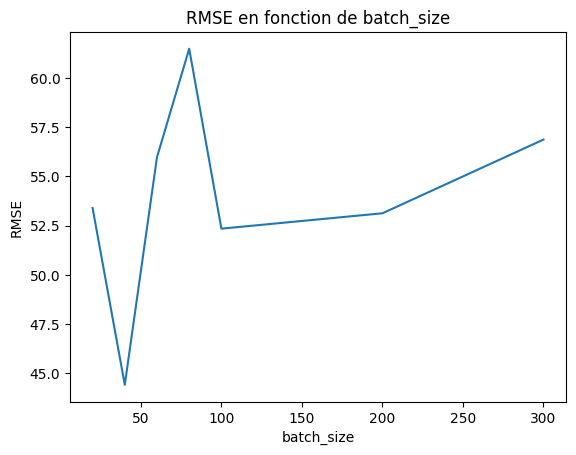

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)


batch_size_values=[]
rmse_values=[]
a=[20,40,60,80,100,200,300]
for batch_size in a:
    # Entraînement de la Random Forest
    rf = RandomForestRegressor(n_estimators=100, max_depth=2)
    rf.fit(train_features, train_labels)

    # Prédiction avec la Random Forest
    rf_predictions_train = rf.predict(train_features)
    rf_predictions_test = rf.predict(test_features)

    # Utilisation des prédictions de la Random Forest comme caractéristiques pour le réseau de neurones
    X_train_with_rf = np.concatenate((train_features, rf_predictions_train.reshape(-1, 1)), axis=1)
    X_test_with_rf = np.concatenate((test_features, rf_predictions_test.reshape(-1, 1)), axis=1)

    # Création et entraînement du réseau de neurones
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_rf.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse')
    model.fit(X_train_with_rf, train_labels, epochs=10, batch_size=batch_size)

    # Prédiction avec le réseau de neurones
    nn_predictions = model.predict(X_test_with_rf)

    # Évaluation des performances
    mse = np.mean((nn_predictions - test_labels) ** 2)
    rmse = np.sqrt(mse)
    
    batch_size_values.append(batch_size)
    rmse_values.append(rmse)

plt.plot(batch_size_values, rmse_values)
plt.xlabel('batch_size')
plt.ylabel('RMSE')
plt.title('RMSE en fonction de batch_size')
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Entraînement de la régression logistique
logreg = LogisticRegression()
logreg.fit(train_features, train_labels)

# Prédiction avec la régression logistique
logreg_predictions = logreg.predict(test_features)

# Utilisation des prédictions de la régression logistique comme caractéristiques pour le réseau de neurones
X_train_with_logreg = np.concatenate((train_features, logreg.predict(train_features).reshape(-1, 1)), axis=1)
X_test_with_logreg = np.concatenate((test_features, logreg_predictions.reshape(-1, 1)), axis=1)

# Création et entraînement du réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_logreg.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train_with_logreg, train_labels, epochs=10, batch_size=32)

# Prédiction avec le réseau de neurones
nn_predictions = model.predict(X_test_with_logreg)

# Évaluation des performances
mse = np.mean((nn_predictions - test_labels) ** 2)
rmse = np.sqrt(mse)
print("RMSE du modèle combinant la régression logistique et le réseau de neurones : ", rmse)



Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 76509.8672
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 1700.9434
Epoch 3/10
189/189 [==============================] - 0s 2ms/step - loss: 1668.5530
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 1612.8628
Epoch 5/10
189/189 [==============================] - 0s 2ms/step - loss: 1584.2906
Epoch 6/10
189/189 [==============================] - 0s 2ms/step - loss: 1567.5824
Epoch 7/10
189/189 [==============================] - 0s 2ms/step - loss: 1526.1737
Epoch 8/10
189/189 [==============================] - 0s 1ms/step - loss: 1494.8113
Epoch 9/10
189/189 [==============================] - 0s 1ms/step - loss: 1479.7986
Epoch 10/10
48/48 [==============================] - 0s 1ms/step
RMSE du modèle combinant la régression logistique et le réseau de neurones :  59.65625901702892


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Entraînement de la régression linéaire
linreg = LinearRegression()
linreg.fit(train_features, train_labels)

# Prédiction avec la régression linéaire
linreg_predictions = linreg.predict(test_features)

# Utilisation des prédictions de la régression linéaire comme caractéristiques pour le réseau de neurones
X_train_with_linreg = np.concatenate((train_features, linreg.predict(train_features).reshape(-1, 1)), axis=1)
X_test_with_linreg = np.concatenate((test_features, linreg_predictions.reshape(-1, 1)), axis=1)

# Création et entraînement du réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_linreg.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train_with_linreg, train_labels, epochs=10, batch_size=32)

# Prédiction avec le réseau de neurones
nn_predictions = model.predict(X_test_with_linreg)

# Évaluation des performances
mse = np.mean((nn_predictions - test_labels) ** 2)
rmse = np.sqrt(mse)
print("RMSE du modèle combinant la régression linéaire et le réseau de neurones : ", rmse)


Epoch 1/10
189/189 [==============================] - 1s 1ms/step - loss: 258922.0156
Epoch 2/10
189/189 [==============================] - 0s 1ms/step - loss: 1466.8944
Epoch 3/10
189/189 [==============================] - 0s 2ms/step - loss: 1565.4213
Epoch 4/10
189/189 [==============================] - 0s 1ms/step - loss: 1410.9490
Epoch 5/10
189/189 [==============================] - 0s 1ms/step - loss: 1430.5149
Epoch 6/10
189/189 [==============================] - 0s 1ms/step - loss: 1413.8693
Epoch 7/10
189/189 [==============================] - 0s 1ms/step - loss: 1351.7477
Epoch 8/10
189/189 [==============================] - 0s 2ms/step - loss: 1342.9484
Epoch 9/10
189/189 [==============================] - 0s 1ms/step - loss: 1351.6227
Epoch 10/10
48/48 [==============================] - 0s 862us/step
RMSE du modèle combinant la régression linéaire et le réseau de neurones :  46.15192142311549
